Sales Data:


,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region,TotalRevenue
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55



Customers Data:


,CustomerID,CustomerName,Region
0,1,Customer_1,West
1,2,Customer_2,South
2,3,Customer_3,West
3,4,Customer_4,East
4,5,Customer_5,West



Products Data:


,Product,Price
0,Laptop,1500
1,Tablet,500
2,Smartphone,1200
3,Monitor,300
4,Keyboard,50


Index(['Product', 'Price'], dtype='object')

PivotTable (Revenue by Region & Product):


<ipython-input-2-e117bc1f81c2>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["Quantity"].fillna(0, inplace=True)


Product,Keyboard,Laptop,Monitor,Smartphone,Tablet
Region,,,,,
East,2496402.98,2325639.45,2650384.26,2561689.35,2503484.71
North,2621697.05,2652925.56,2241453.22,2472203.75,3010931.54
South,2695977.84,2626530.41,2652228.88,2726864.73,2769039.61
West,2786048.14,2570569.77,2888205.42,2673185.67,2591883.76


<ipython-input-2-e117bc1f81c2>:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)


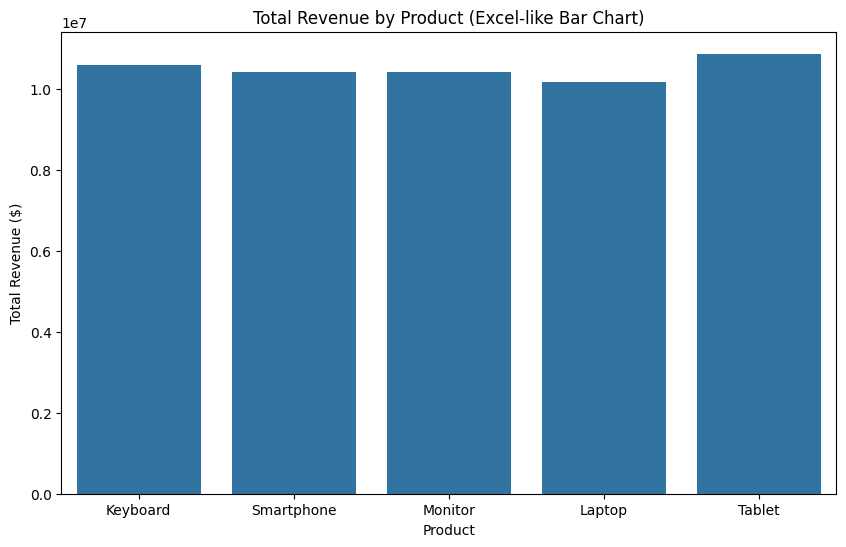

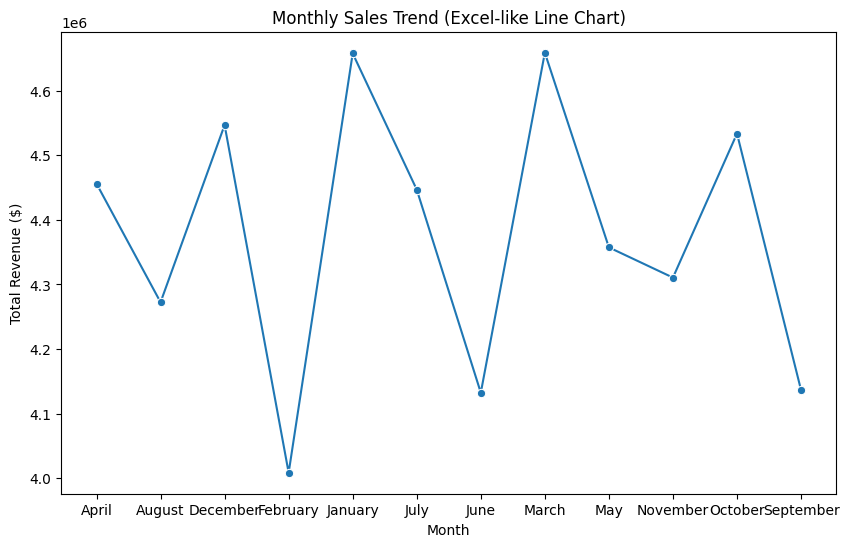

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'\n📂 To open the Excel file (Ubuntu/Linux):\nIf you have LibreOffice or Excel for Linux installed, you can open the file automatically with:\n\npython Copy\n\nimport subprocess\nsubprocess.call(["libreoffice", "analysis_results.xlsx"])\n✅ Make sure LibreOffice is installed: sudo apt install libreoffice\n\n🔍 To check where the file was saved:\nAdd this to print the full file path:\n\npython Copy\n\nimport os\nprint("Saved to:", os.path.abspath("analysis_results.xlsx"))\n'

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# Step 1: Load Excel Data
# ----------------------------------------

# Read all sheets from Excel
excel_file = "sales_data(adv_excel).xlsx"
#to find sheetnames
#sheetnames=excel_file.sheet_names
#print(sheet_names)
sales_df = pd.read_excel(excel_file, sheet_name="Sales")
customers_df = pd.read_excel(excel_file, sheet_name="Customers")
products_df = pd.read_excel(excel_file, sheet_name="Products")

print("Sales Data:")
display(sales_df.head())

print("\nCustomers Data:")
display(customers_df.head())

print("\nProducts Data:")
display(products_df.head())

# ----------------------------------------
# Step 2: Data Cleaning (Excel-like "Format as Table")
# ----------------------------------------

# Remove duplicates
sales_df.drop_duplicates(inplace=True)

# Handle missing values (e.g., fill with 0)
sales_df["Quantity"].fillna(0, inplace=True)

# Convert OrderDate to datetime
sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])

# ----------------------------------------
# Step 3: Advanced Excel Formulas (VLOOKUP, SUMIF)
# ----------------------------------------

# VLOOKUP: Merge Customer Name into Sales Data
# Fix chained assignment
sales_df["Quantity"] = sales_df["Quantity"].fillna(0)



# Clean up column names before merge
sales_df["Product"] = sales_df["Product"].str.strip()
products_df["Product"] = products_df["Product"].str.strip()

# Merge with product prices
print(products_df.columns)  # Check if 'Price' exists
sales_df = pd.merge(sales_df, products_df[["Product", "Price"]], on="Product", how="left")

# ----------------------------------------
# Step 4: PivotTables (Excel-like Summarization)
# ----------------------------------------

# Create a PivotTable: Total Revenue by Region and Product
pivot_table = pd.pivot_table(
    sales_df,
    values="TotalRevenue",
    index="Region",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

print("\nPivotTable (Revenue by Region & Product):")
display(pivot_table)

# ----------------------------------------
# Step 5: Visualization (Excel-like Charts)
# ----------------------------------------

# Bar Chart: Total Revenue by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)
plt.title("Total Revenue by Product (Excel-like Bar Chart)")
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.show()

# Line Chart: Monthly Sales Trend
sales_df["Month"] = sales_df["OrderDate"].dt.month_name()
monthly_sales = sales_df.groupby("Month")["TotalRevenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="Month", y="TotalRevenue", marker="o")
plt.title("Monthly Sales Trend (Excel-like Line Chart)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.show()

# ----------------------------------------
# Step 6: Export Results to Excel
# ----------------------------------------

with pd.ExcelWriter("analysis_results.xlsx") as writer:
    sales_df.to_excel(writer, sheet_name="Processed Sales", index=False)
    pivot_table.to_excel(writer, sheet_name="PivotTable")


#for colab downloading th excel file
from google.colab import files
files.download("analysis_results.xlsx")
'''
📂 To open the Excel file (Ubuntu/Linux):
If you have LibreOffice or Excel for Linux installed, you can open the file automatically with:

python Copy

import subprocess
subprocess.call(["libreoffice", "analysis_results.xlsx"])
✅ Make sure LibreOffice is installed: sudo apt install libreoffice

🔍 To check where the file was saved:
Add this to print the full file path:

python Copy

import os
print("Saved to:", os.path.abspath("analysis_results.xlsx"))
'''
